<a href="https://colab.research.google.com/github/Mayank0195/Capstone_Project-_EDA_PLaystore_App_Review_Analysis/blob/main/Capstone_Project__EDA_PLaystore_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.
#Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
#Explore and analyze the data to discover key factors responsible for app engagement and success.

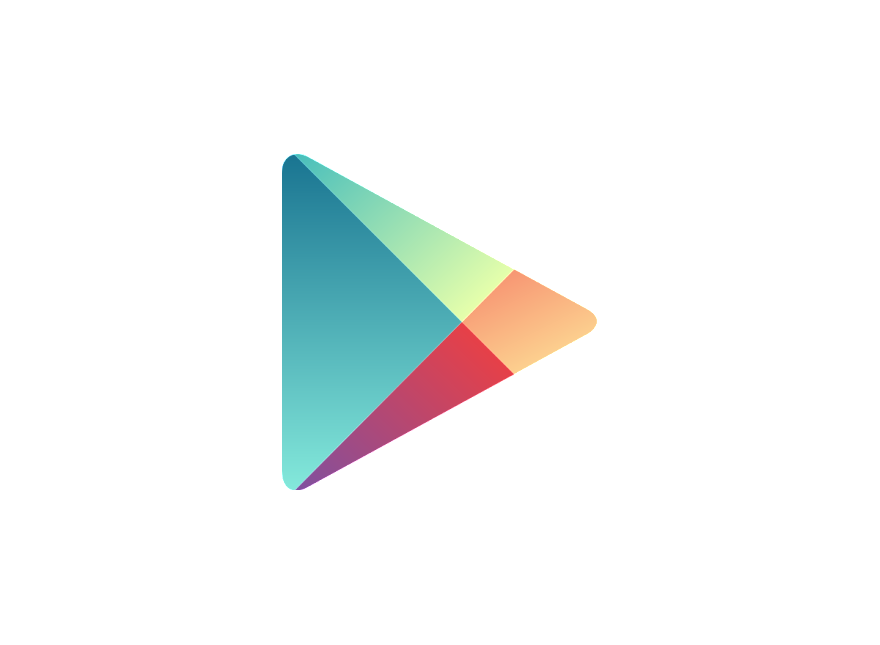

###Android Play Store Dataset Cleaning
####Overview and Motivation
This EDA project aims to discover patterns that lead to a successfull application on the Google Play Store. This will be done by analyzing the historical data collected from the Google Play Store as according to dataset source.

Dataset columns description
* App: Application name
* Category: Category the app belongs to
* Rating: Overall user rating of the app (as when scraped)
* Reviews: Number of user reviews for the app (as when scraped)
* Size: Size of the app (as when scraped)
* Installs: Number of user downloads/installs for the app (as when scraped)
* Type: Paid or Free
*Price: Price of the app (as when scraped)
*Content: Rating Age group the app is targeted at - Children / Mature 21+ / Adult
* Genres: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.
* Last Updated: Date when the app was last updated on Play Store (as when scraped)
* Current Ver: Current version of the app available on Play Store (as when scraped)
* Android Ver: Min required Android version (as when scraped)

In [1]:
# importing required file required for the EDA 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#**1. Dataset Reading**


In [2]:
# importing drive on the volab notebook for the easy access of the data provided 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#importing the pathway for the Playstore Data
route1='/content/drive/MyDrive/AlmaBetter/Capstone_Project_EDA/Play_Store_Data.csv'
df=pd.read_csv(route1)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
#importing the pathway for the User reviews data
route2='/content/drive/MyDrive/AlmaBetter/Capstone_Project_EDA/User_Reviews.csv'
df_reviews=pd.read_csv(route2)
df_reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [5]:
type(df)

pandas.core.frame.DataFrame

**Checking the Head and Tail of the Playstore data** 

In [6]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [7]:
df.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


**Checking he head and taill if the user review Data** 

In [8]:
df_reviews.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [9]:
df_reviews.tail(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64285,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64286,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64287,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64288,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64289,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


#**2. Dataset Discovery**
**dicovering the dataset and get a notion of what the attributes describe**.


In [10]:
df.count()

App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64

In [11]:
df_reviews.count()

App                       64295
Translated_Review         37427
Sentiment                 37432
Sentiment_Polarity        37432
Sentiment_Subjectivity    37432
dtype: int64

In [12]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [13]:
df_reviews.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [14]:
df.shape

(10841, 13)

In [15]:
df_reviews.shape

(64295, 5)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [17]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [18]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [19]:
df_reviews.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


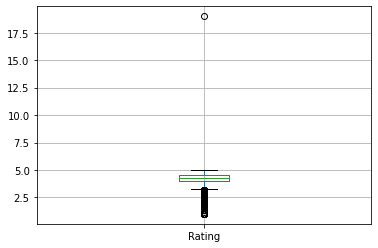

In [20]:
df.boxplot();

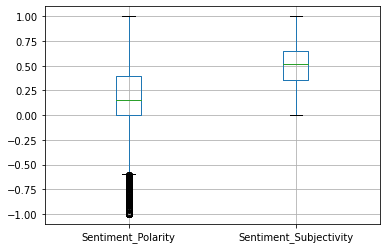

In [21]:
df_reviews.boxplot();

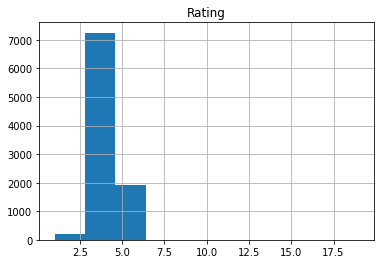

In [22]:
df.hist();

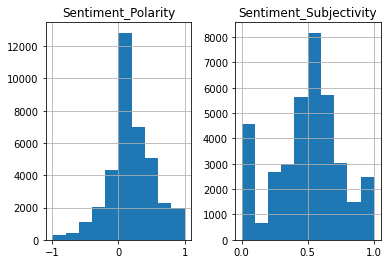

In [23]:
df_reviews.hist();

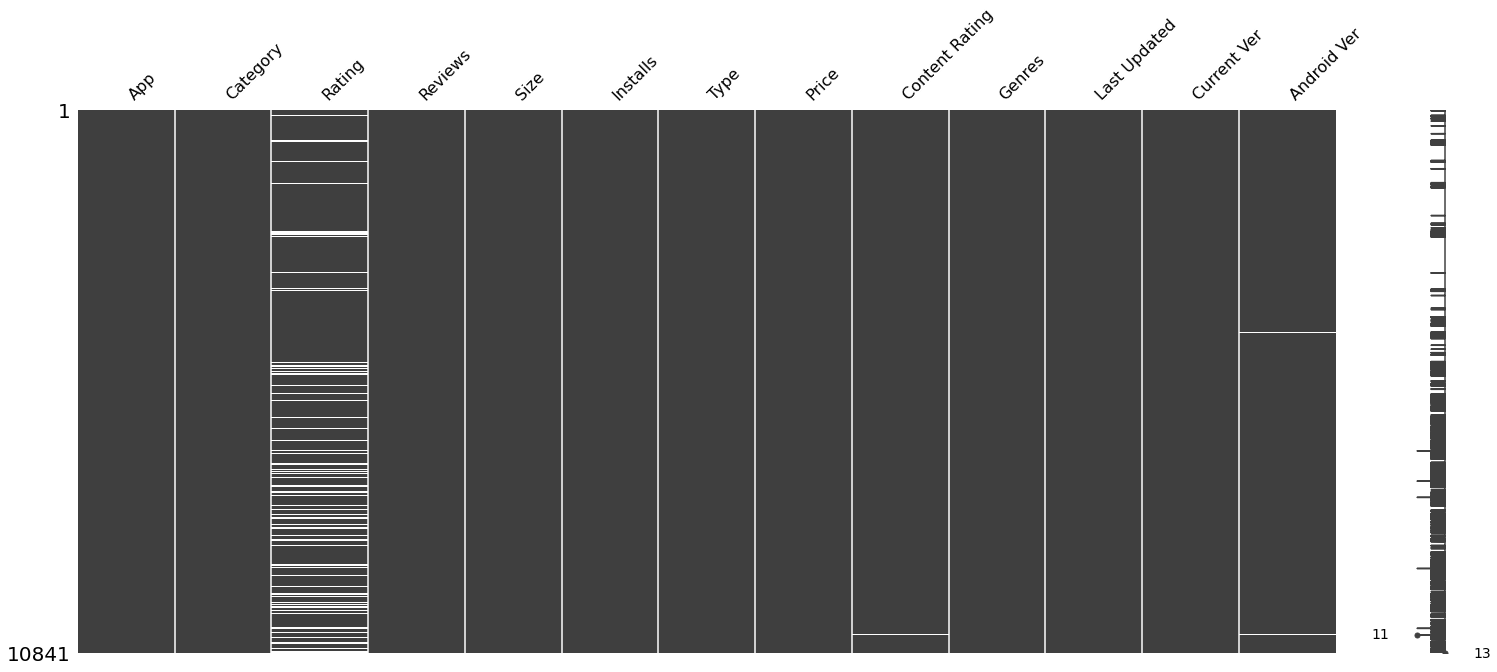

In [24]:
import missingno as msno
msno.matrix(df)
plt.show()

**This shows that the data has many missing values under the column Rating, Content Rating and Android Version.**

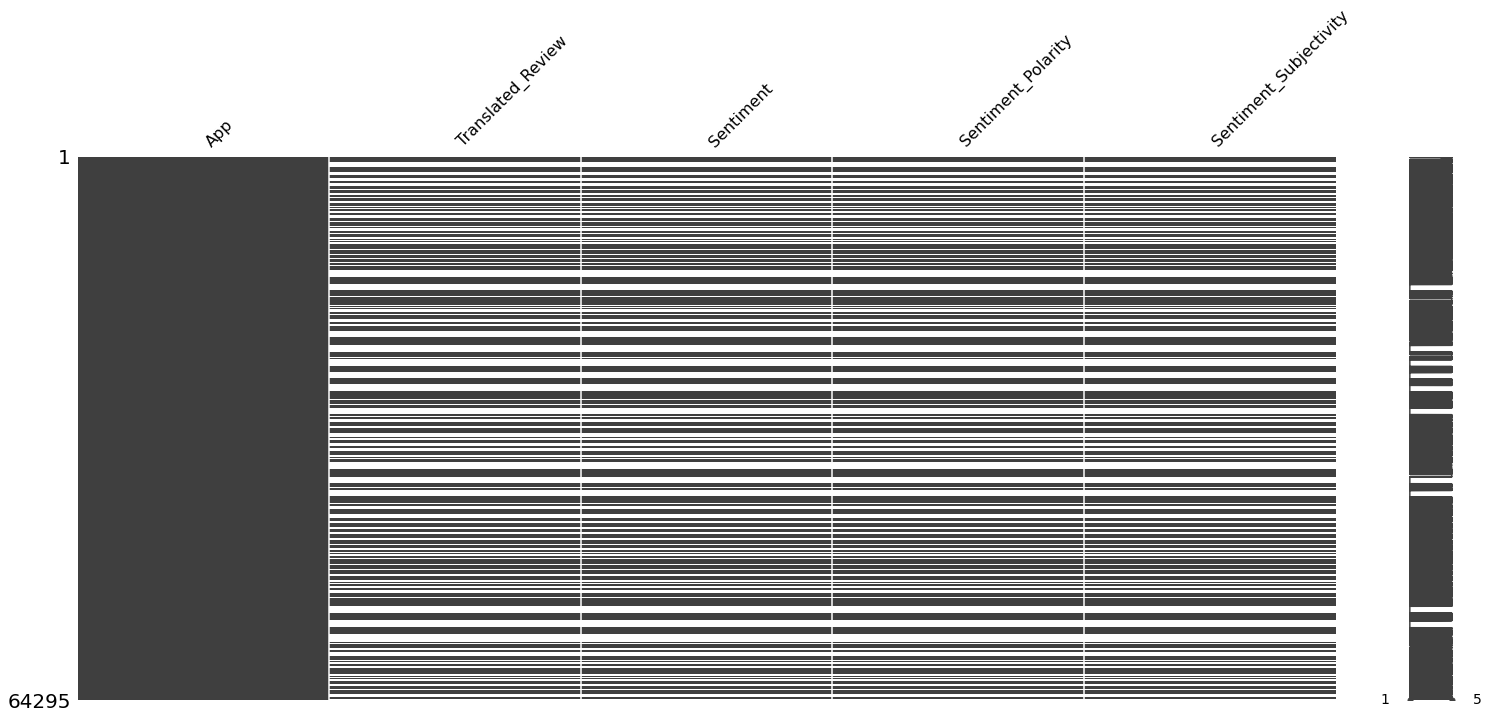

In [25]:
import missingno as msno
msno.matrix(df_reviews)
plt.show()

**This also shows that even the User Reviews csv is also full of missing data.**

#**3**.**DATA CLEANING**


**Checking the missing values in the Playstore data**

In [26]:
df.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


**Countiing the number of missing values in the Playstore Data.**


In [27]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [28]:
df_reviews.isnull()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,False,False,False,False,False
1,False,False,False,False,False
2,False,True,True,True,True
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
64290,False,True,True,True,True
64291,False,True,True,True,True
64292,False,True,True,True,True
64293,False,True,True,True,True


**Checking the missing values in the User reviews data**

In [29]:
df_reviews.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

##**3.1 Outliers**
An outlier is an object that deviates significantly from the rest of the objects. They can be caused by measurement or execution errors.

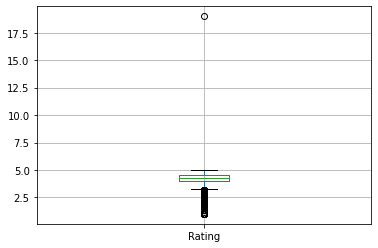

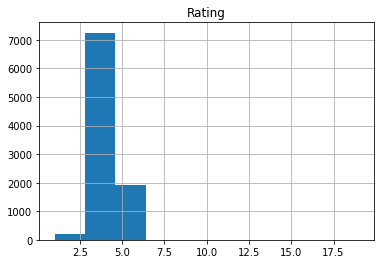

In [30]:
df.boxplot();
df.hist();

In [31]:
df[df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [32]:
df.drop([10472], inplace = True)

In [33]:
df[10470:10474]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up


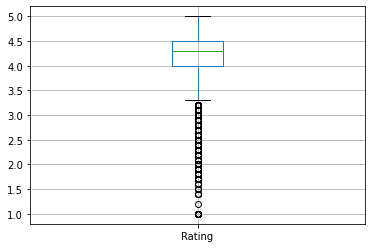

In [34]:
df.boxplot()

###**3.2 Remove columns that are 90% empty**

In [35]:
len(df)

10840

In [36]:
threshold = len(df) * 0.1
threshold

1084.0

In [37]:
df.dropna(thresh = threshold, axis = 1, inplace = True)

In [38]:
print(df.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [39]:
boolean = df['App'].duplicated().any()
boolean

True

In [40]:
df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9659, dtype: int64

In [41]:
df[df['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


###**3.3 Checking for duplicate values**


In [42]:
df.drop_duplicates(inplace = True)

In [43]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [44]:
df_reviews.drop_duplicates(inplace=True)

In [45]:
df_reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
...,...,...,...,...,...
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000
64230,Housing-Real Estate & Property,"Useless app, I searched flats kondapur, Hydera...",Negative,-0.316667,0.400000


#**4.DATA MANIPULATION**

In [46]:
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [47]:
def impute_medium(series):
  return series.fillna(series.median)

In [48]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [49]:
print(df['Type'].mode())
print(df['Current Ver'].mode())
print(df['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


**Filling the Missing values with mode values of Type, Current ver and Android ver so that the values can be filled and the data looks more presentable.**


In [50]:
df['Type'].fillna(str(df['Type'].mode().values[0]),inplace=True)
df['Current Ver'].fillna(str(df['Current Ver'].mode().values[0]),inplace=True)
df['Android Ver'].fillna(str(df['Android Ver'].mode().values[0]),inplace=True)

In [51]:
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

**Removing a $ sign from the Price as it was creating a hindarnce while doing the analysis of the data.**

In [52]:
df['Price'] = df['Price'].apply((lambda x: str(x).replace('$','')if '$' in str(x) else str(x)))
df['Price'] = df['Price'].apply((lambda x: float(x)))
df['Reviews'] = pd.to_numeric(df['Reviews'], errors ='coerce')

**Removing a + sign from the Installs as it was creating a hindarnce while doing the analysis of the data.**



In [53]:
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x)) 
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: float(x))

In [54]:
df.describe()

,Rating,Reviews,Installs,Price
count,8892.000000,1.035700e+04,1.035700e+04,10357.000000
mean,4.187877,4.059046e+05,1.415776e+07,1.030800
std,0.522377,2.696778e+06,8.023955e+07,16.278625
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,3.200000e+01,1.000000e+03,0.000000
50%,4.300000,1.680000e+03,1.000000e+05,0.000000
75%,4.500000,4.641600e+04,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


**Checking how many Apps are free for the user and how many are paid.**


In [55]:
df[df.Price>0].count()

App               765
Category          765
Rating            613
Reviews           765
Size              765
Installs          765
Type              765
Price             765
Content Rating    765
Genres            765
Last Updated      765
Current Ver       765
Android Ver       765
dtype: int64

In [56]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


**Remove missing values.**

In [57]:
df1 = df.dropna()
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500.0,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


**Removing the missing values as to make the data more presentable and suitable for analysis.**

In [58]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

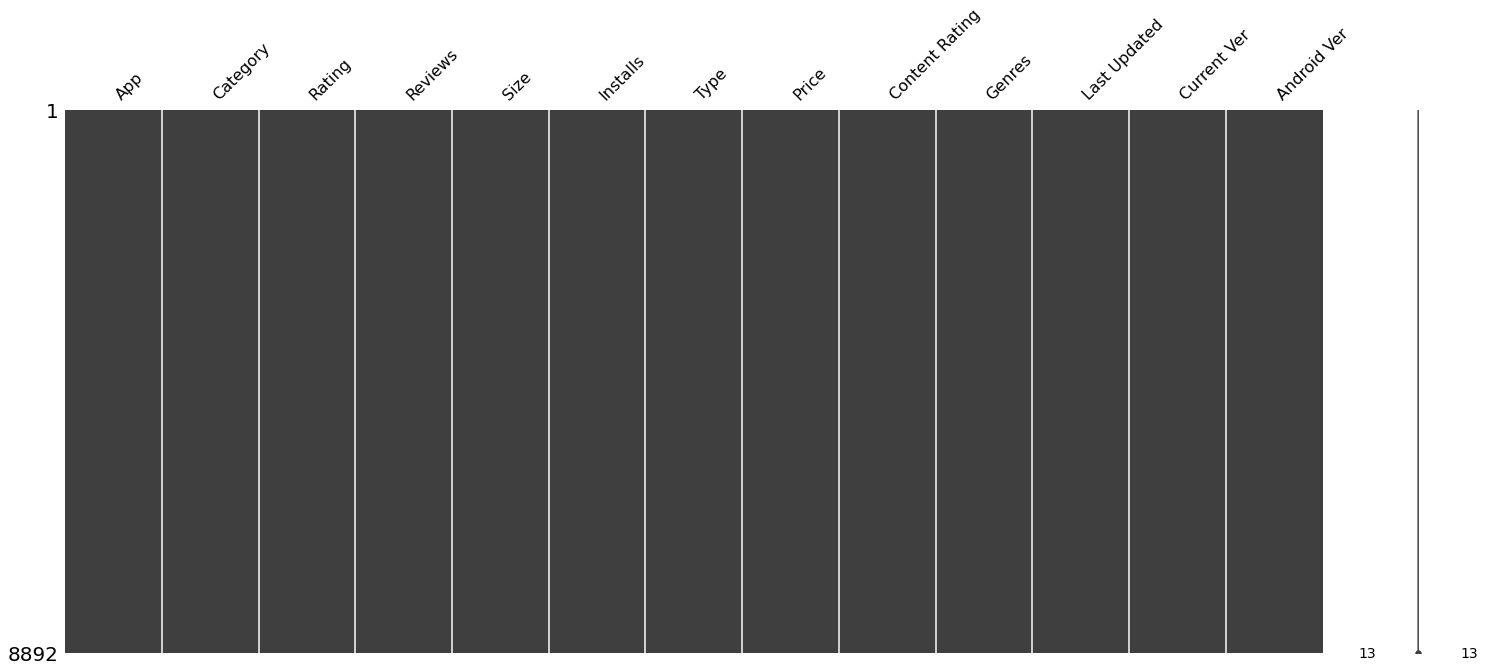

In [59]:
import missingno as msno
msno.matrix(df1)
plt.show()

**Showing that there is no missing value left in the data and that it is more presentable and suitable for analysis.**

In [60]:
g = df_reviews.groupby('App')
g

In [61]:
for App ,App_df_reviews in g:
    print(App)
    print(App_df_reviews),

Streaming output truncated to the last 5000 lines.
53164  Genius Scan - PDF Scanner  ...               0.189766
53165  Genius Scan - PDF Scanner  ...               0.636667
53166  Genius Scan - PDF Scanner  ...               0.900000
53167  Genius Scan - PDF Scanner  ...               0.666667
53168  Genius Scan - PDF Scanner  ...               0.200000
53169  Genius Scan - PDF Scanner  ...               0.453571
53170  Genius Scan - PDF Scanner  ...               0.500000
53171  Genius Scan - PDF Scanner  ...               0.753333
53172  Genius Scan - PDF Scanner  ...               0.616667
53173  Genius Scan - PDF Scanner  ...               0.875000
53174  Genius Scan - PDF Scanner  ...               0.000000
53175  Genius Scan - PDF Scanner  ...               0.394444
53176  Genius Scan - PDF Scanner  ...               0.552222
53177  Genius Scan - PDF Scanner  ...                    NaN

[14 rows x 5 columns]
Geo Tracker - GPS tracker
                             App  ... Sentimen

**Removing the missing values from the User reviews dataset**.


In [62]:
new_df_reviews = df_reviews.dropna()
new_df_reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [63]:
new_df_reviews.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [64]:
new_df_reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [65]:
new_df_reviews.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

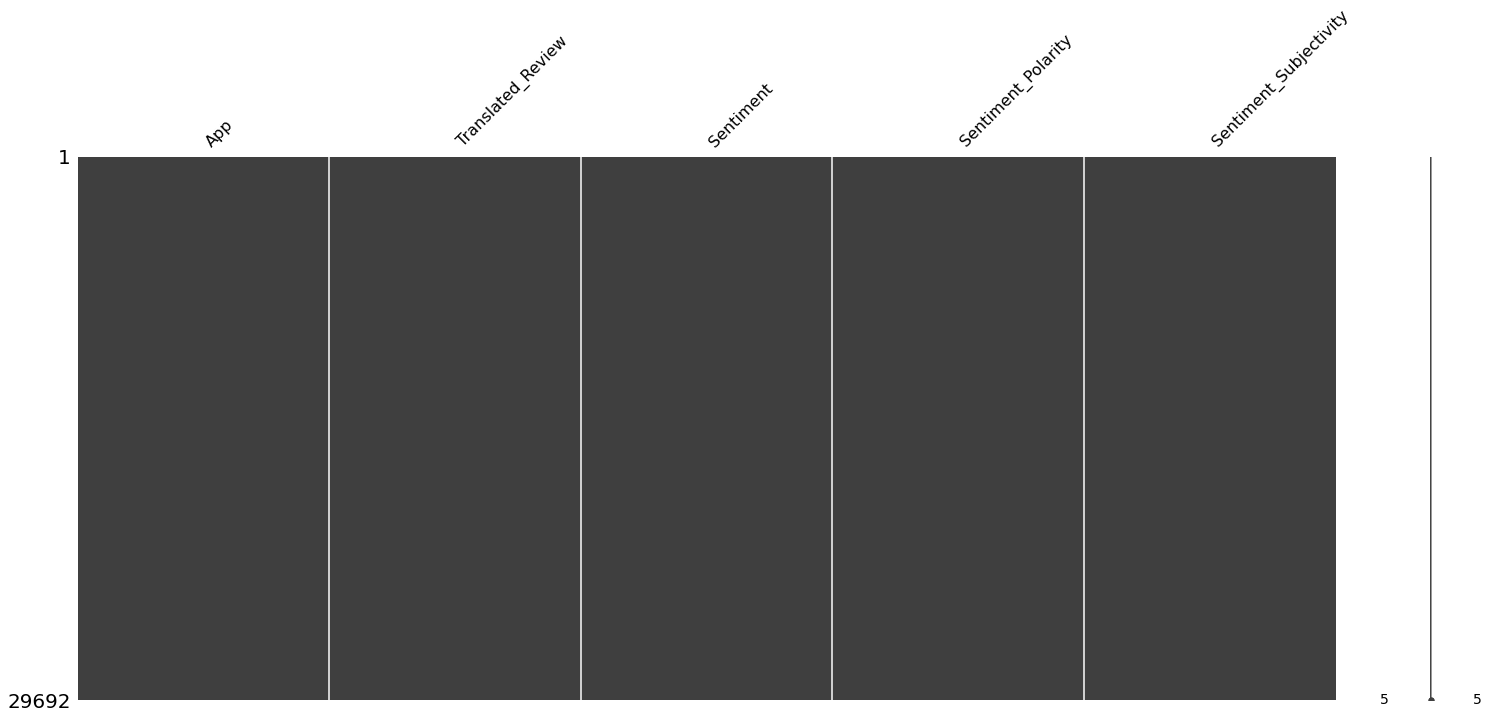

In [66]:
import missingno as msno
msno.matrix(new_df_reviews)
plt.show()

**This shows that the missing data in the User Data has been removed successfully.**

In [67]:
grp = new_df_reviews.groupby('App')
x = grp['Sentiment_Polarity'].agg(np.mean)
y = grp['Sentiment_Subjectivity'].agg(np.mean)
print(x)
print(y)

App
10 Best Foods for You                                 0.465906
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室                      0.358227
11st                                                  0.185943
1800 Contacts - Lens Store                            0.318145
1LINE – One Line with One Touch                       0.196290
                                                        ...   
Hotels.com: Book Hotel Rooms & Find Vacation Deals    0.098559
Hotspot Shield Free VPN Proxy & Wi-Fi Security        0.223750
Hotstar                                               0.038178
Hotwire Hotel & Car Rental App                        0.187029
Housing-Real Estate & Property                       -0.021427
Name: Sentiment_Polarity, Length: 865, dtype: float64
App
10 Best Foods for You                                 0.493254
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室                      0.508907
11st                                                  0.455340
1800 Contacts - Lens Store                            0.

# **Merging dataframes on apps**

In [68]:
merged_df = df.merge(new_df_reviews, on="App")
merged_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500000,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800000,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40409,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Overall great app. Best gallery seen far,Positive,0.475000,0.512500
40410,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,"Recommended, 100% love it, keep good work dev ...",Positive,0.566667,0.733333
40411,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Too much ads,Positive,0.200000,0.200000
40412,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,10000000.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Just allow time ...,Neutral,0.000000,0.000000


**In the merged dataframe, we have three new columns i.e.. Sentiment, Sentiment Polarity and Sentiment Subjectivity. Sentiment basically determines the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral. Sentiment Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Sentiment Subjectivity generally refer to personal opinion, emotion or judgment, which lies in the range of [0,1]**

#**5. Dataset Visualization**
**Asking questions and aswering them.**
* **Installs per Category**
* **Pricing vs Category**
* **Number of Reviews per Category**
* **What are the top 20 apps present in the google play store per in the Genres?**
* **What are the Genre that are getting installed the most in top 20 Genres?**
* **Count of applications for each Category**
* **Number of Installed applications for each category**
* **Distribution of Rating**
* **Highest and Lowest Genres**
* **Rating according to Genres**
* **What are teh count of applications in each category differentiated by their type**
* **How many apps wqere installed according to their type**
* **How does size impact on the Number of installs of any applications**
* **Histogram of log installs**
* **Histogram of size**
* **Different Android Version**
* **Scatter Matrix**
* **What is the percentage of paid to free apps?**
* **What is the most dominant category?**
* **What size should my app have?**
* **What price should my paid app have?**
* **What are the number of installs for apps priced more than $100?**
* **What is the most successful category?**
* **Distribution of app sizes**
* **Rating per categories and type**
* **Distribution of content rating per categories**
* **Number of Installs type wise according to Genre**
* **Histogram of Subjectivity**
* **Does Sentiment_subjectivity propotional to sentiment_polarity**
* **Wordcloud**
* **Percentage of Review Sentiments**

In [69]:
  grp = df1.groupby('Category')
  x = grp['Installs'].agg(np.mean)
  y = grp['Price'].agg(np.sum)
  z = grp['Reviews'].agg(np.mean)
  print(x)
  print(y)
  print(z)

Category
ART_AND_DESIGN         2.003760e+06
AUTO_AND_VEHICLES      7.278055e+05
BEAUTY                 6.408619e+05
BOOKS_AND_REFERENCE    1.082651e+07
BUSINESS               3.198215e+06
COMICS                 9.661397e+05
COMMUNICATION          7.867180e+07
DATING                 1.298883e+06
EDUCATION              4.138388e+06
ENTERTAINMENT          2.212306e+07
EVENTS                 3.544313e+05
FAMILY                 5.844663e+06
FINANCE                2.430008e+06
FOOD_AND_DRINK         2.431866e+06
GAME                   2.937045e+07
HEALTH_AND_FITNESS     5.194680e+06
HOUSE_AND_HOME         1.839441e+06
LIBRARIES_AND_DEMO     9.551231e+05
LIFESTYLE              1.753250e+06
MAPS_AND_NAVIGATION    5.840867e+06
MEDICAL                1.396115e+05
NEWS_AND_MAGAZINES     2.520145e+07
PARENTING              6.223222e+05
PERSONALIZATION        6.691461e+06
PHOTOGRAPHY            3.197777e+07
PRODUCTIVITY           3.731458e+07
SHOPPING               1.273927e+07
SOCIAL             

## **Number of Installs per Category**

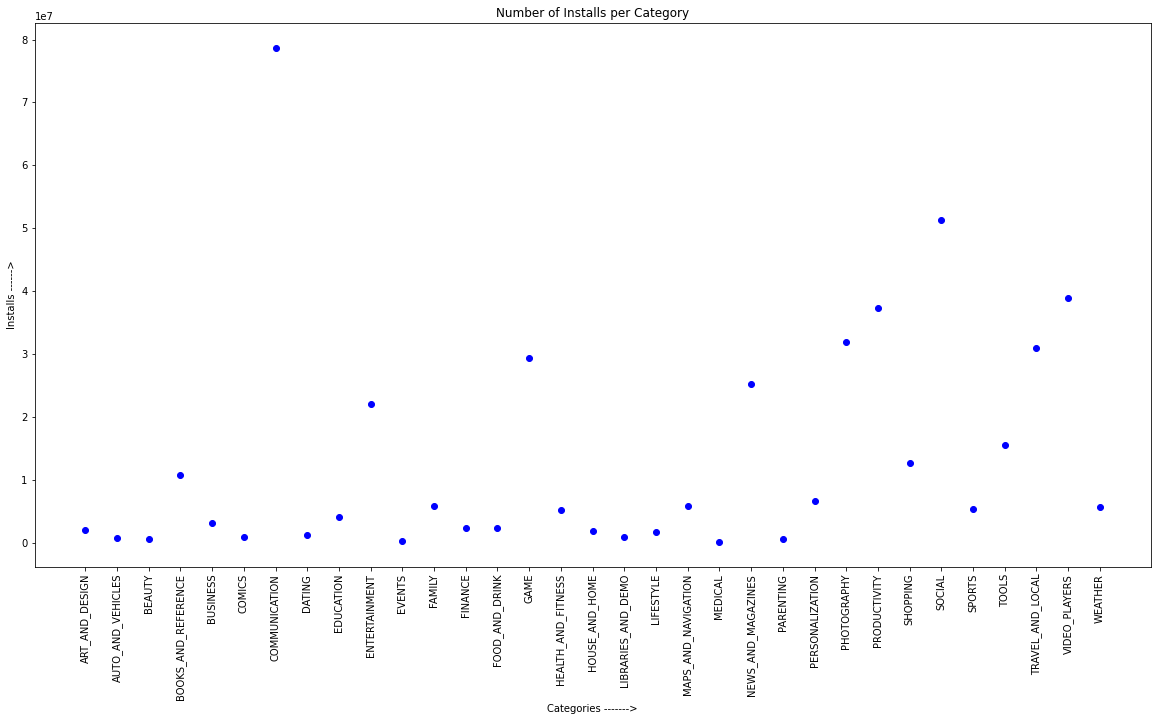

In [70]:
plt.figure(figsize=(20,10))
plt.plot(x, 'ro', color='b')
plt.xticks(rotation = 90)
plt.title('Number of Installs per Category')
plt.xlabel('Categories ------->')
plt.ylabel('Installs ------>');

### **Pricing per Category**

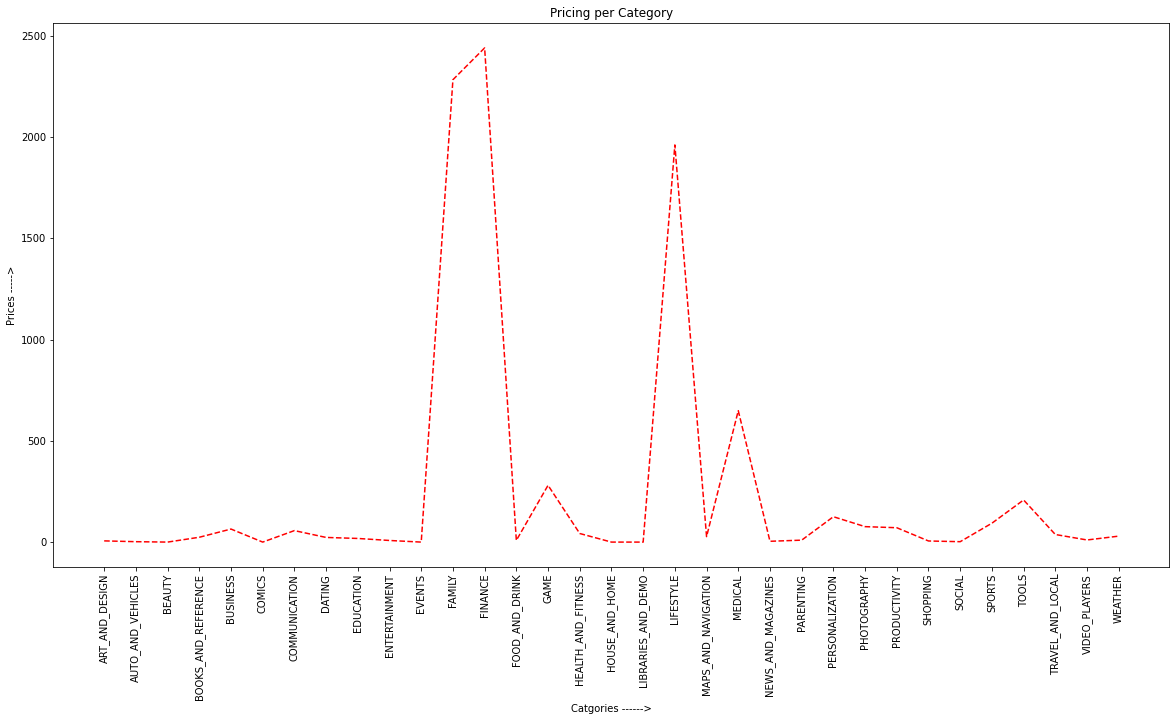

In [71]:
plt.figure(figsize = (20,10))
plt.plot(y, 'r--', color = 'r')
plt.xticks(rotation = 90)
plt.title('Pricing per Category')
plt.xlabel('Catgories ------>')
plt.ylabel('Prices ----->');

### **Number of Reviews per Category**

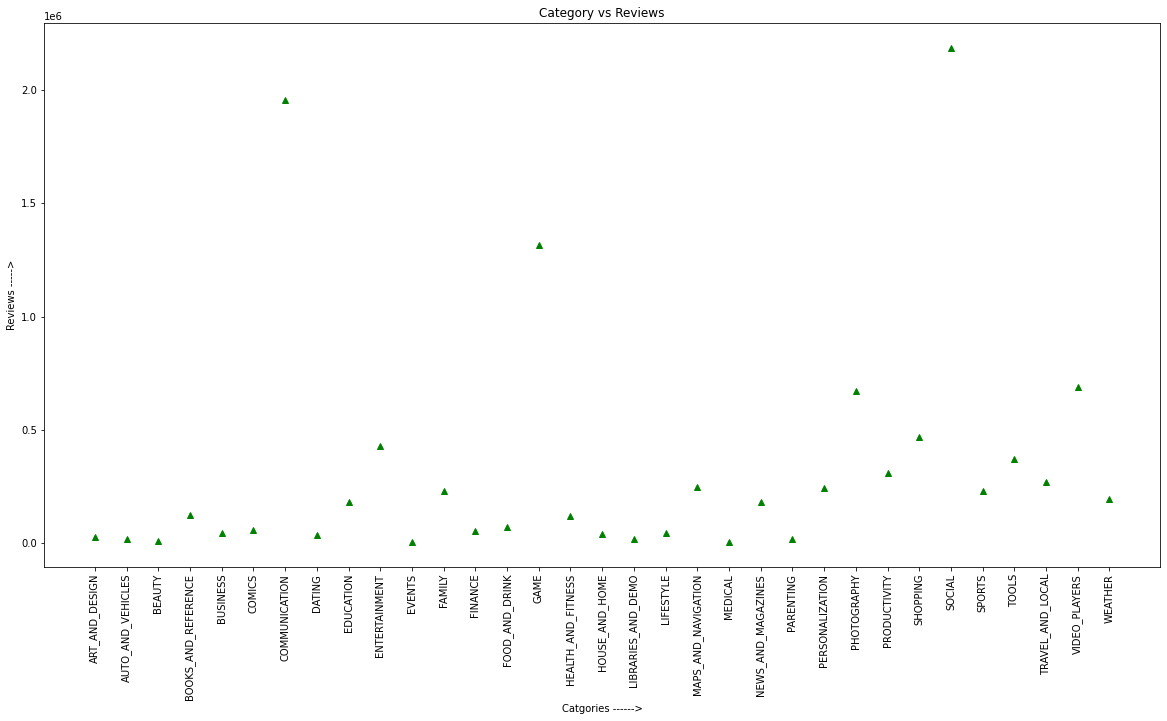

In [72]:
plt.figure(figsize = (20,10))
plt.plot(z, 'g^', color = 'g')
plt.xticks(rotation = 90)
plt.title('Category vs Reviews')
plt.xlabel('Catgories ------>')
plt.ylabel('Reviews ----->');

### **What are the top 20 apps present in the google play store as per their Genres?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


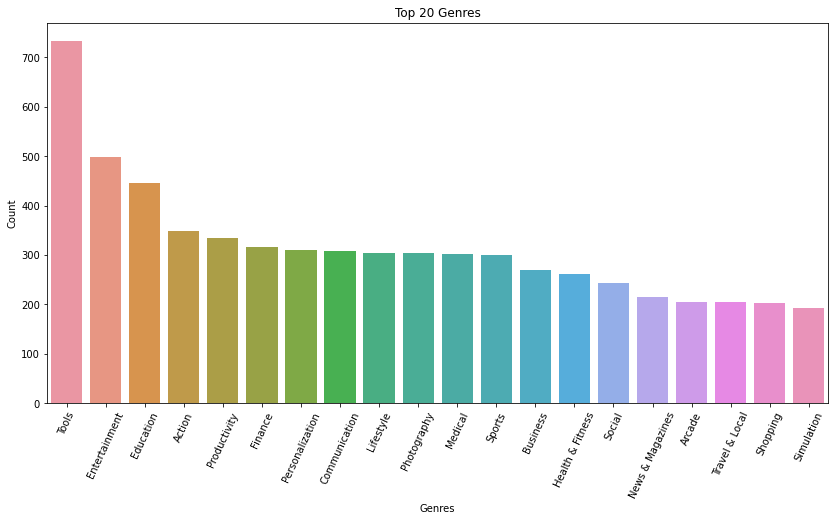

In [73]:
top_genres = df1.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})
genres_installs = df1.groupby(['Genres'])[['Installs']].sum()
top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')
top_20_genres_installs = top_genres_installs.head(20)

plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Number of application")
plt.title("Top 20 Genres")
sns.barplot(top_20_genres_installs.Genres, top_20_genres_installs.Count)
plt.show();

### **Which are the Genres that are getting installed the most in top 20 Genres?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


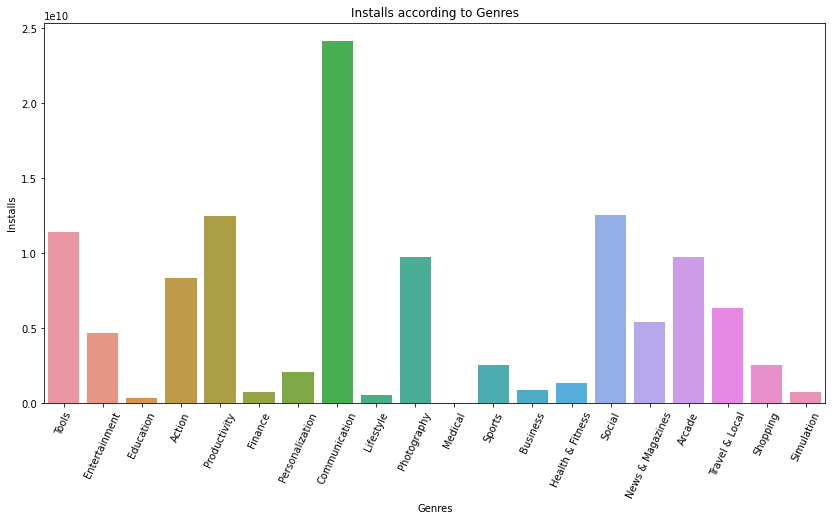

In [74]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.title("Installs according to Genres")
sns.barplot(top_20_genres_installs.Genres, top_20_genres_installs.Installs)
plt.show()

### **As we can see from the above two plots: Maxinum number of apps present in google play store comes under Tools, Entertainment and Education Genres but as per the installation and requirement in the market plot, scenario is not the same. Maximum installed apps comes under Communication, Tools and Productivity Genres.**

### **Count of applications for each Category**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


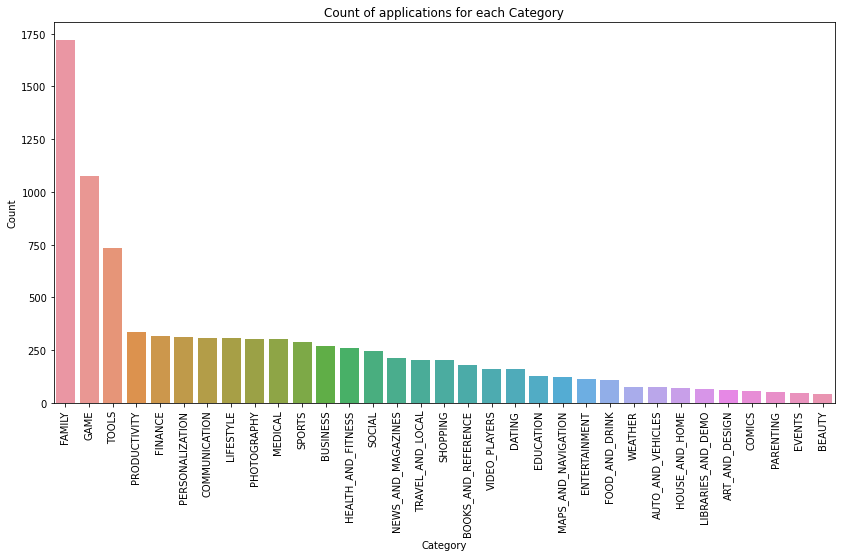

In [75]:
top_category = df1.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})
category_installs = df1.groupby(['Category'])[['Installs']].sum()
top_category_installs = pd.merge(top_category, category_installs, on='Category')
top_20_category_installs = top_category_installs

plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of application")
plt.title("Count of applications for each Category")
sns.barplot(top_20_category_installs.Category, top_20_category_installs.Count)
plt.show()

### **Number of installed applications for each Category**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


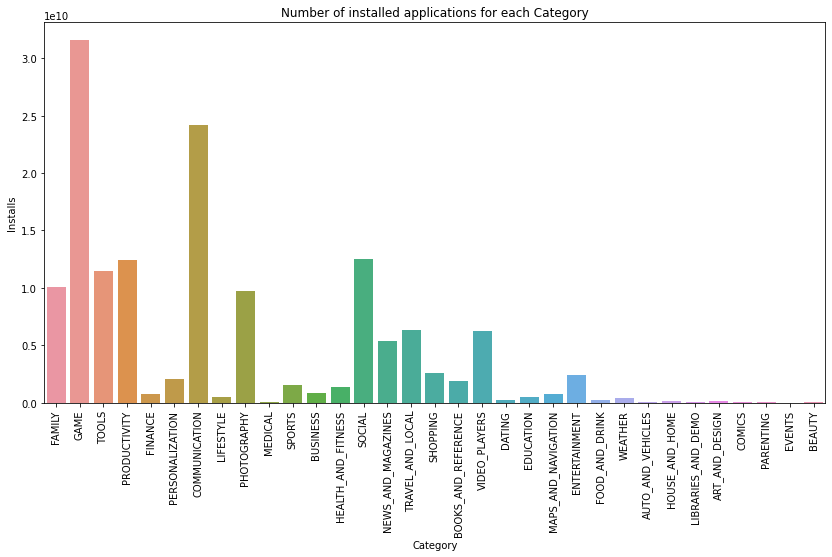

In [76]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installed applications for each Category")
sns.barplot(top_20_category_installs.Category, top_20_category_installs.Installs)
plt.show();

### **Average rating**

In [77]:
df1.dropna()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500.0,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [78]:
genres_ratings_df = df1.groupby(['Genres'])[['Rating']].mean()
genres_installs_ratings = pd.merge(top_genres_installs, genres_ratings_df, on='Genres')
genres_installs_ratings['Rating'].describe()

count    115.000000
mean       4.258865
std        0.182193
min        3.800000
25%        4.148914
50%        4.266667
75%        4.354464
max        4.800000
Name: Rating, dtype: float64

### **Distribution of Rating**

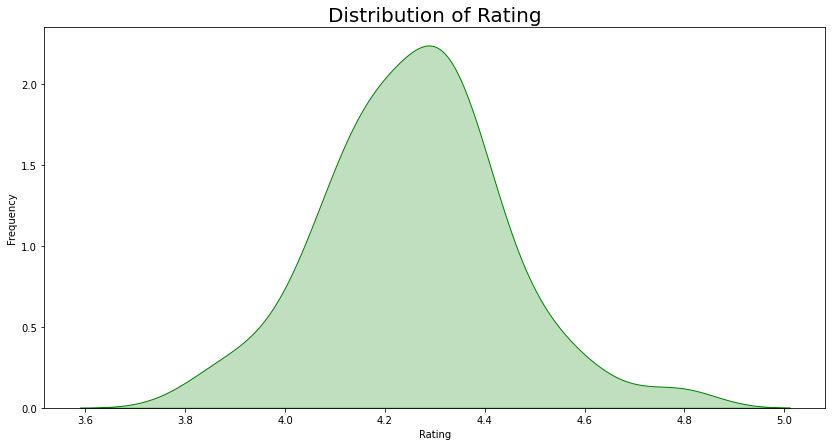

In [79]:
plt.figure(figsize=(14,7))
g = sns.kdeplot(genres_installs_ratings.Rating, color="Green", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)
plt.show()

### **Highest and lowest rated Genres**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


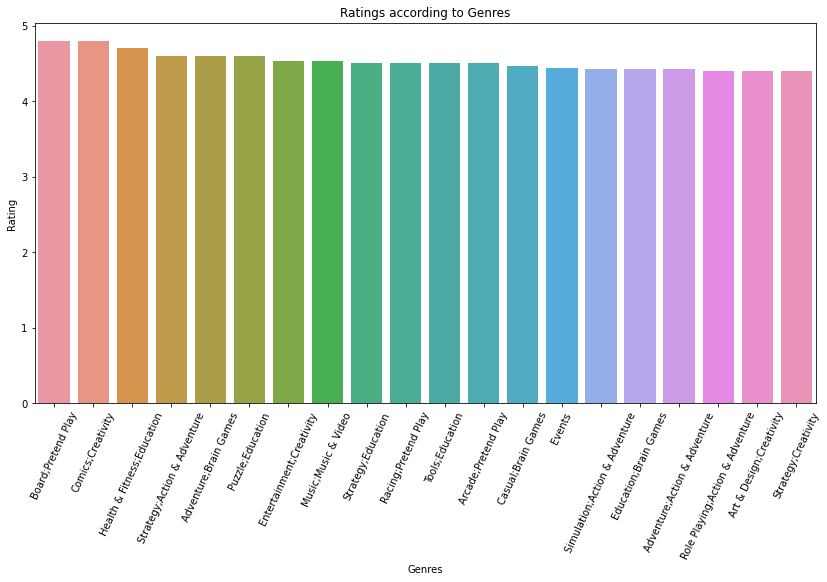

In [80]:
genres_installs_ratings.sort_values('Rating', ascending =False, inplace=True)

highest_rated_genres = genres_installs_ratings.iloc[0:20]
lowest_rated_genres = genres_installs_ratings.iloc[-20:]
lowest_rated_genres = lowest_rated_genres[lowest_rated_genres['Rating'].notnull()]

plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Ratings according to Genres")
sns.barplot(highest_rated_genres.Genres, highest_rated_genres.Rating)
plt.show()


### **Ratings according to Genres**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


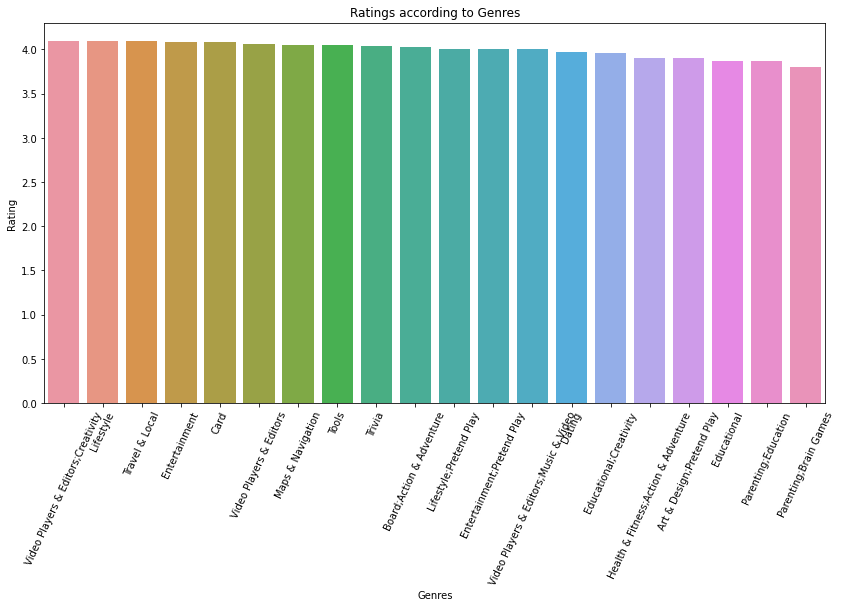

In [81]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Ratings according to Genres")
sns.barplot(lowest_rated_genres.Genres, lowest_rated_genres.Rating)
plt.show()

### **What are the count of applications in each category differentiated by their type?**

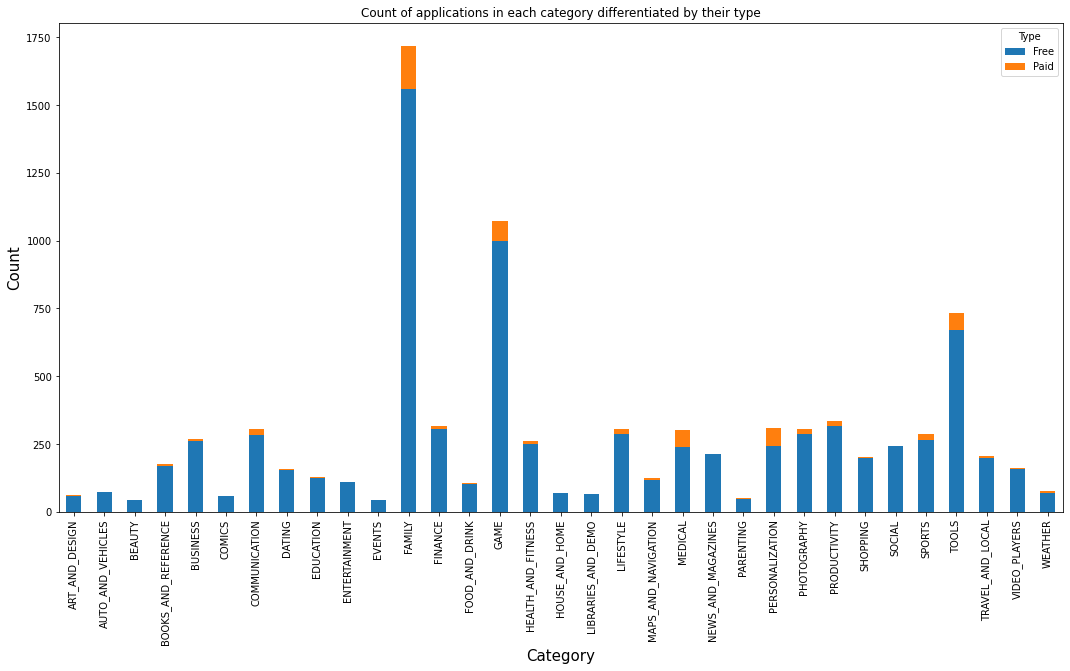

In [82]:
app_count = df1.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count','index':'App'})
df_app_count = app_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()


df_app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(18,9))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of applications in each category differentiated by their type")
plt.show()

**It looks like certain app categories have more free apps available for download than others. In our dataset, the majority of apps in Family, Food & Drink and Tools, as well as Social categories were free to install. At the same time Family, Sports, Tools and Medical categories had the biggest number of paid apps available for download.**

### **How many apps were installed according to its type?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


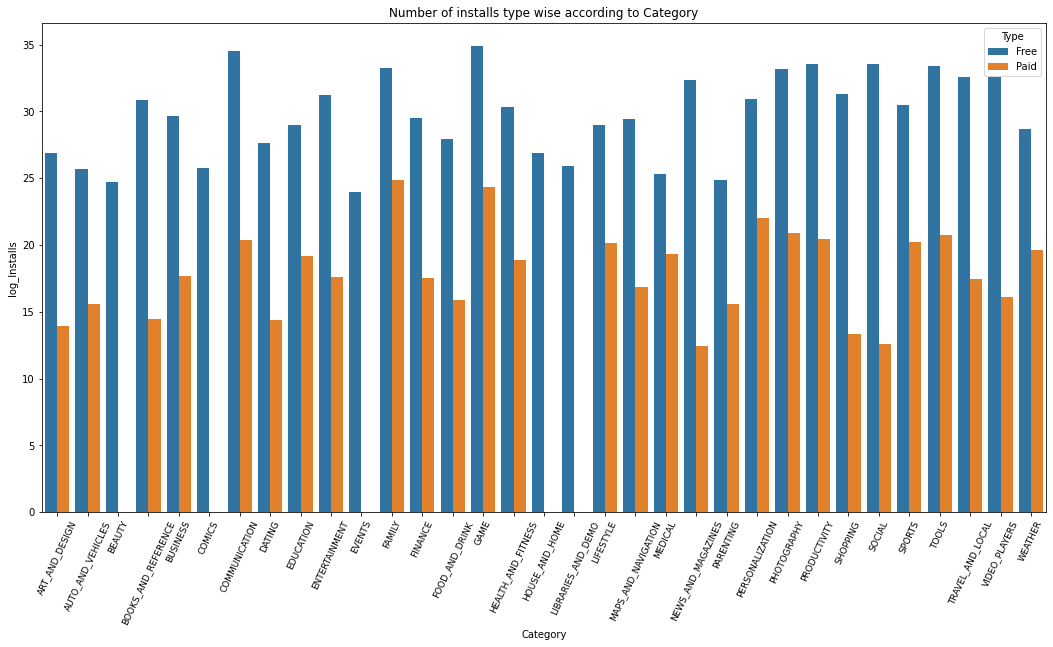

In [83]:
df['log_installs'] = np.log2(df1['Installs'])
df['Gaming Category App'] = df1['Category']=='GAME'
categoty_type_installs = df1.groupby(['Category','Type'])[['Installs']].sum().reset_index()
categoty_type_installs['log_Installs'] = np.log2(categoty_type_installs['Installs'])

plt.figure(figsize=(18,9))
plt.xticks(rotation=65,fontsize=9)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installs type wise according to Category")
sns.barplot('Category', 'log_Installs', hue='Type', data=categoty_type_installs);
plt.show();

**It can be concludd that the number of free applications installed by the user are high when compared with the paid ones.**

**Size of the applications present in the datset are in MB and KB. Therefore for ease in data processing, converting entire size column to MB.**

In [84]:
# Converting KB to MB 
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(x))

### **How does size impact on the number of installs of any application?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


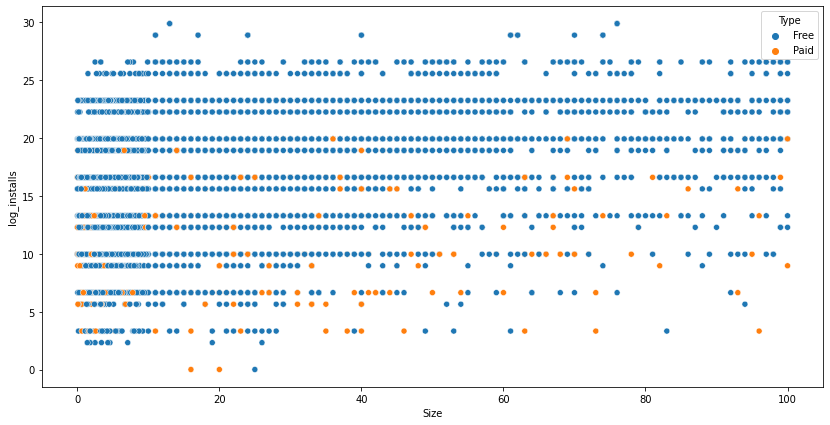

In [85]:
plt.figure(figsize=(14,7))
sns.scatterplot(df['Size'], df['log_installs'], hue=df['Type'])
plt.show()

## **Histogram of log installs**

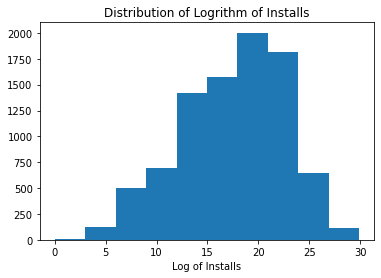

In [86]:
df.loc[df['log_installs']== df['log_installs'].min(),'log_installs']=0


plt.xlabel("Log of Installs")
plt.title("Distribution of Logrithm of Installs")
plt.hist(df['log_installs']);

### **Histogram of size**

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


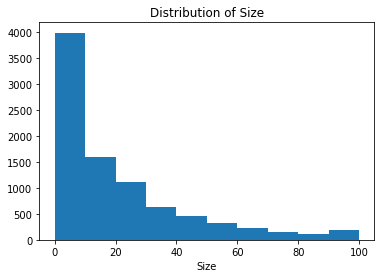

In [87]:
# to remove null values from size column
df1.loc[df1['Size'].isnull(),'Size']=0

plt.xlabel("Size")
plt.title("Distribution of Size")
plt.hist(df['Size']);
plt.show()

## ** Different Android version**

In [88]:
pip install plotly

In [89]:
import plotly.graph_objects as go
labels = df1['Android Ver'].unique()
values=[]
for each in labels:
    values.append(len(df1[df1['Android Ver']==each]))

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3, title="Android Version")])
fig.show()


## **Scatter Plot**

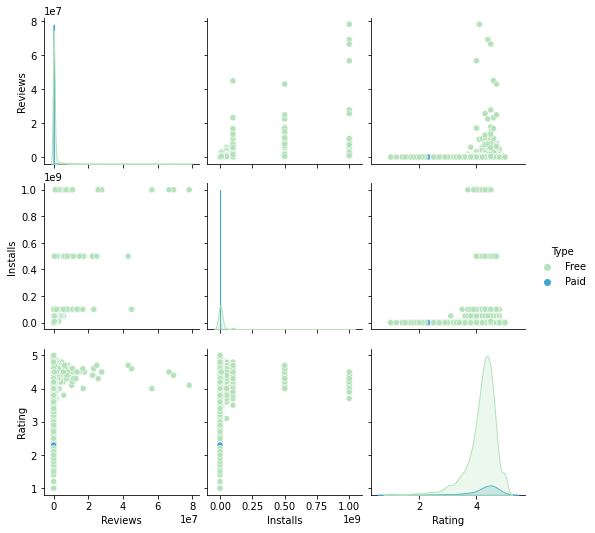

In [90]:
sns.pairplot(df1[["Size", "Reviews", "Installs", "Rating", "Type"]], hue="Type", palette="GnBu")

**This matches our assumption that size greatly affects other features. The Scatter Matrix shows that when the app size is relatively small, other features prosper. This shows that cosumer behaviour on the play store is greatly affected by the app download size**.

**Takeaway: Developers should optimize their app download size as much as possible**

###**What is the percentage of paid to free apps?**

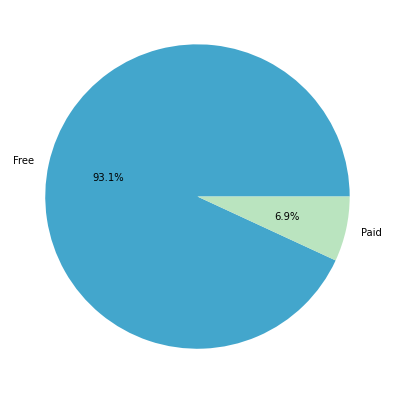

In [91]:
plt.rcParams['figure.figsize']=(14,7)
size = df1["Type"].value_counts()
labels = df1["Type"].unique()
colors=["#43a6cc", "#bae4bf"]

plt.pie(size, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()

## **What size should my app have?**

21.28778830257038

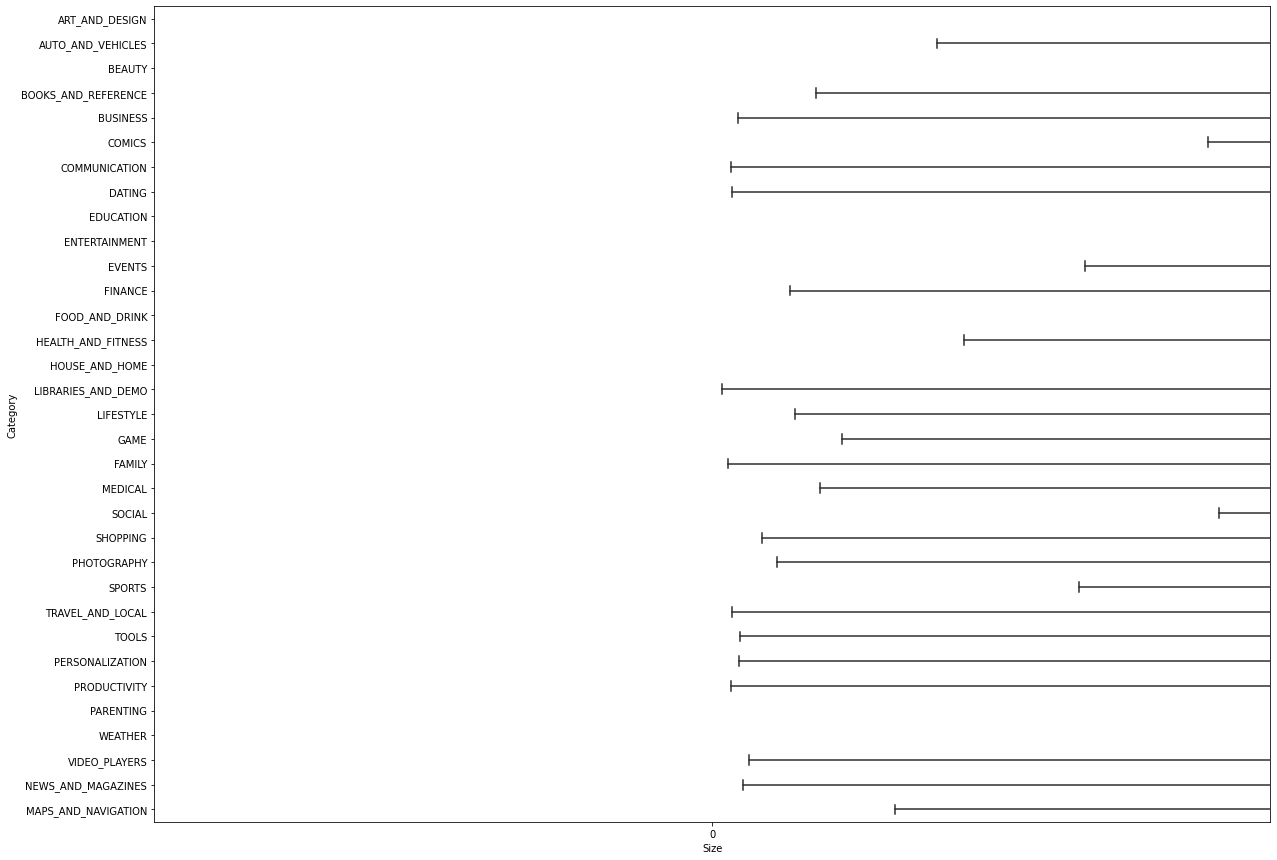

In [92]:
plt.rcParams['figure.figsize']=(20,15)
medians = df.groupby(['Category'])['Size'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]
ax = sns.boxplot(x="Size", y="Category", data=df, palette="GnBu")
ax = sns.boxplot()
df["Size"].mean()

**The trend is games have a much larger download size than any other category. If you're developing anything other than a game, you need to optimize your downlaod size. on Average any app should have a size of 17.8 MB.**

### **What is the most dominant category?**

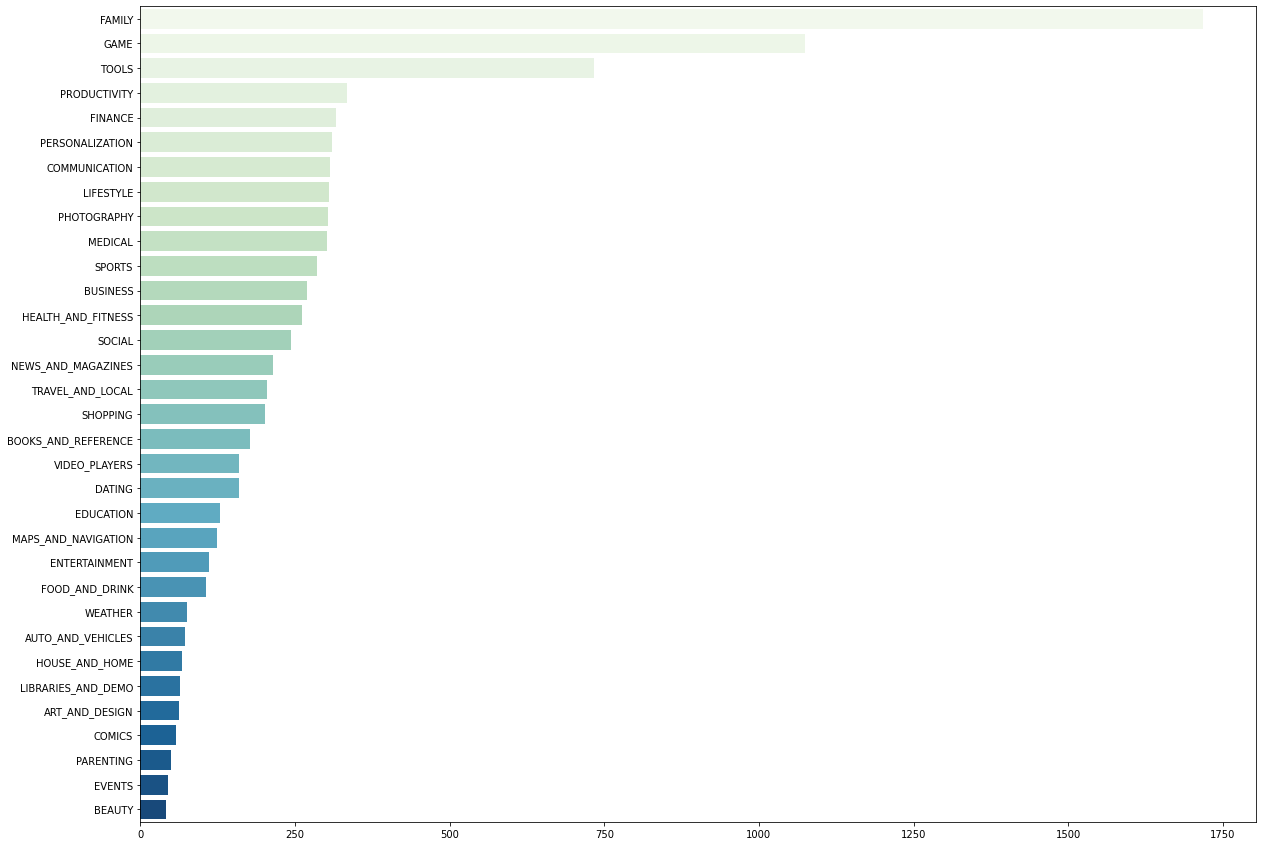

In [93]:
categories = df1["Category"].value_counts()
sns.barplot(x=categories.values, y=categories.index, palette="GnBu")

**This is an interesting finding, our first assumption for the most dominant category was family.**

###**What price should my paid app have?**

0.9631545209176688

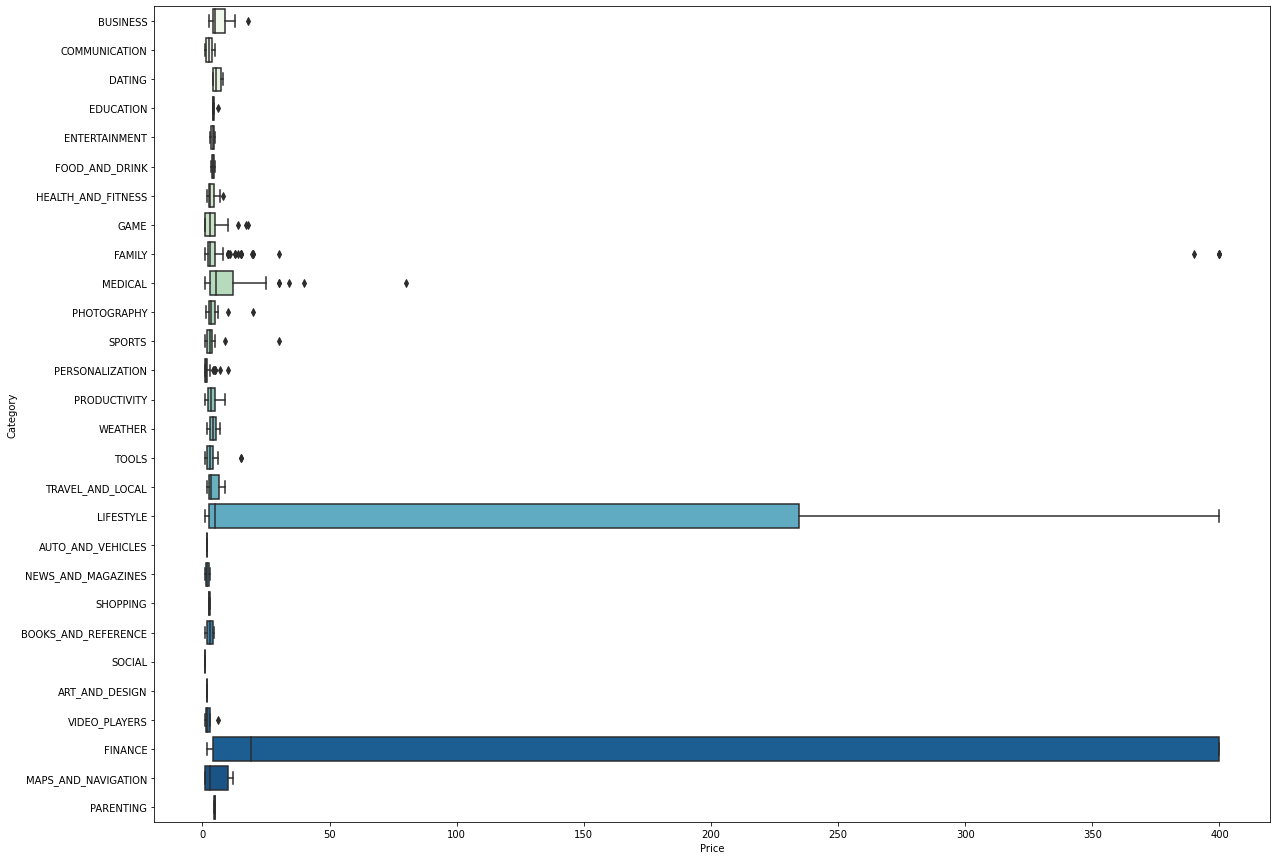

In [94]:
paid_apps = df1[df1["Type"] == "Paid"]
sns.boxplot(x="Price", y="Category", data=paid_apps, palette="GnBu")
df1["Price"].mean()


**Finance and lifestyle are valued the most but it's intresting to find that there are apps with values of more than $100.**

**On average an app price is $1 **



### **What are the number of installs for apps priced more than $100?**

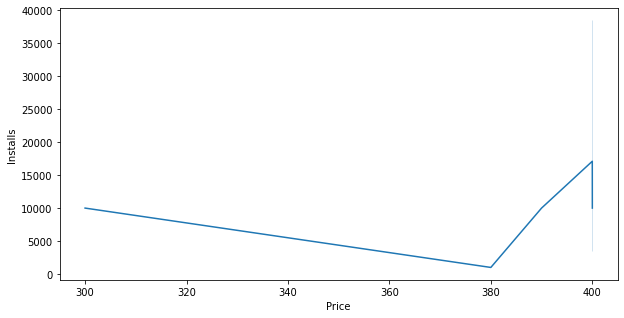

In [95]:
plt.rcParams['figure.figsize']=(10,5)
expensive_apps = df1[df1["Price"] > 100]
sns.lineplot(x="Price", y="Installs", data=expensive_apps, palette="GnBu")

### **What is the most successful category?**

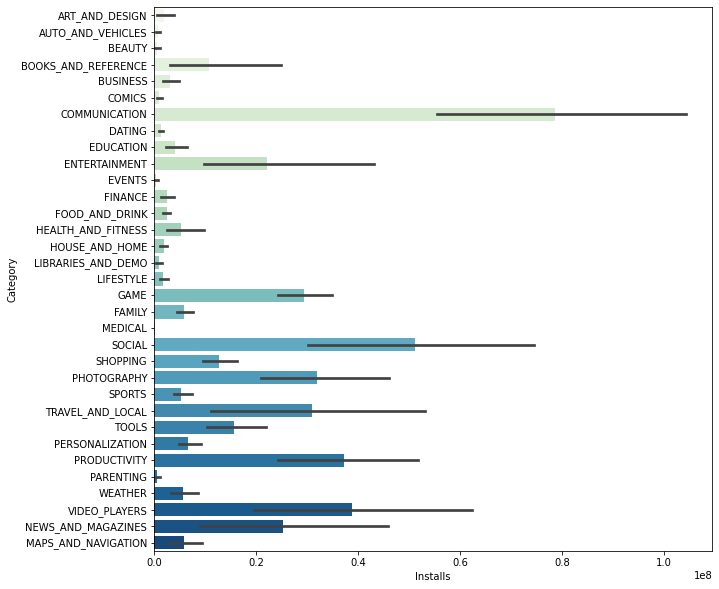

In [96]:
plt.rcParams['figure.figsize']=(10,10)
plot = sns.barplot(x="Installs", y="Category", data=df1, palette="GnBu")

**Most successful category based on the number of installs is the communication category.**

### **Distribution of app sizes**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



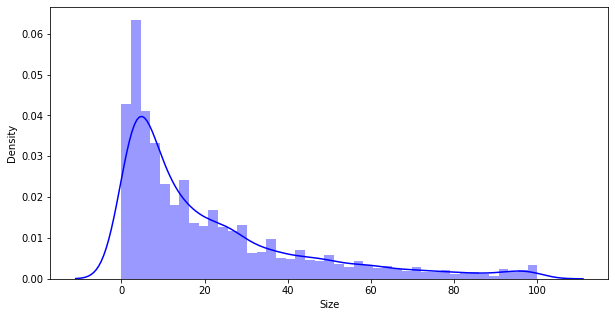

In [97]:
plt.rcParams['figure.figsize']=(10,5)
sns.distplot(df["Size"], color="blue")

### **Rating per categories and type**

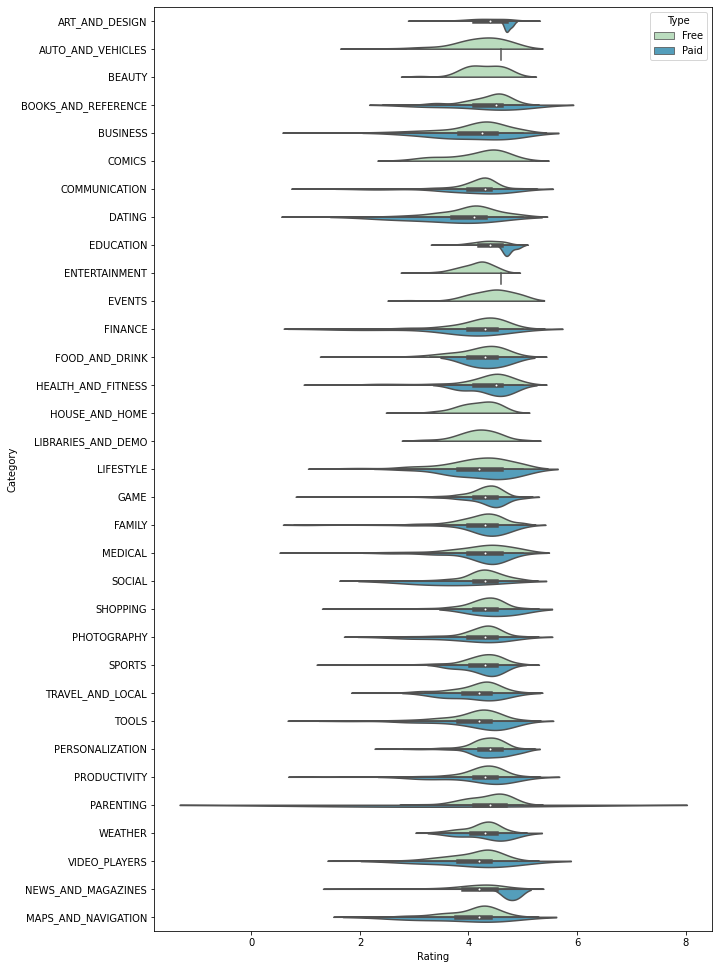

In [98]:
plt.rcParams['figure.figsize']=(10,17)
sns.violinplot(x="Rating", y="Category", hue="Type", data=df1, split=True, palette="GnBu")

### **Distribution of content rating per categories**

---



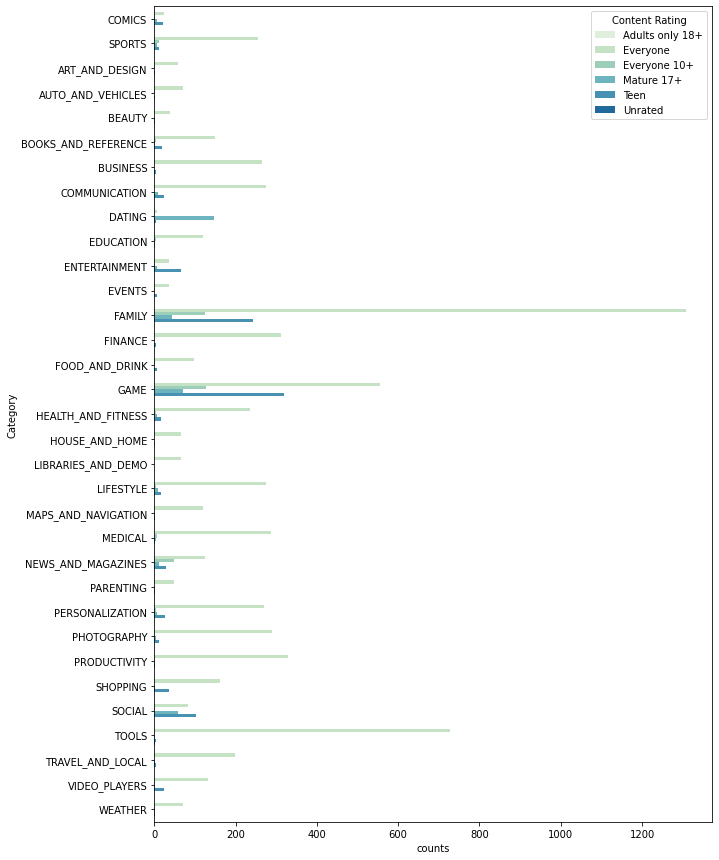

In [99]:
plt.rcParams['figure.figsize']=(10,15)
content_category = df1[["Content Rating", "Category"]].groupby(["Content Rating", "Category"]).size().reset_index(name='counts')
sns.barplot(x="counts" , y="Category", hue="Content Rating",data=content_category, palette="GnBu")

### **Number of installs type wise according to Genres**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



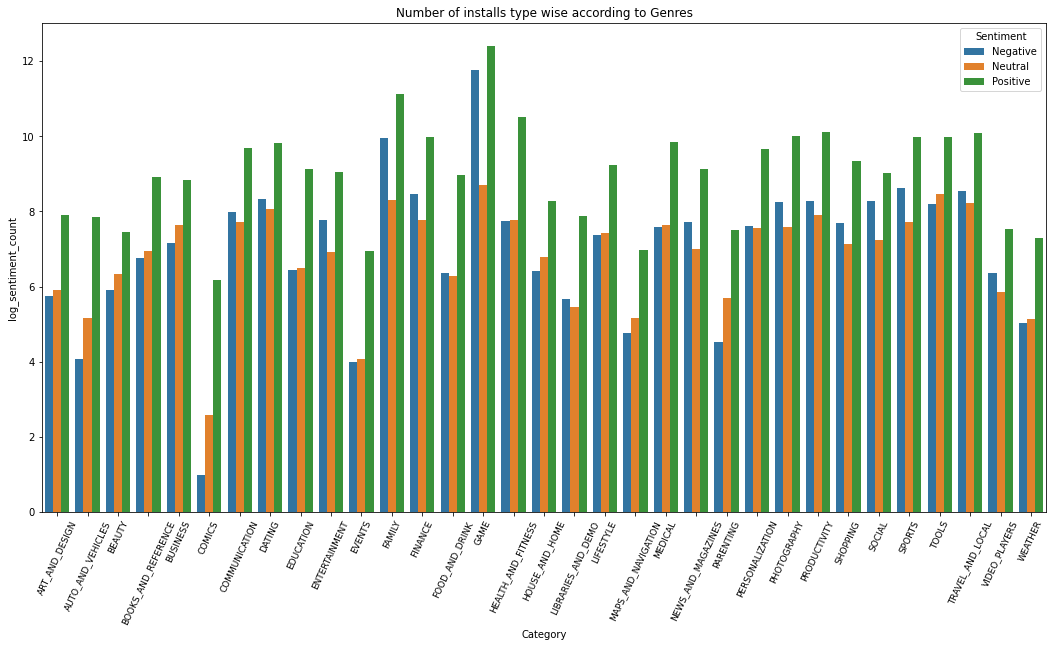

In [100]:
category_sentiment = merged_df.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')
category_sentiment['log_sentiment_count'] = np.log2(category_sentiment['Sentiment Count'])

plt.figure(figsize=(18,9))
plt.xticks(rotation=65,fontsize=9)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installs type wise according to Genres")
sns.barplot('Category', 'log_sentiment_count', hue='Sentiment', data=category_sentiment);

### **Histogram of subjectivity**

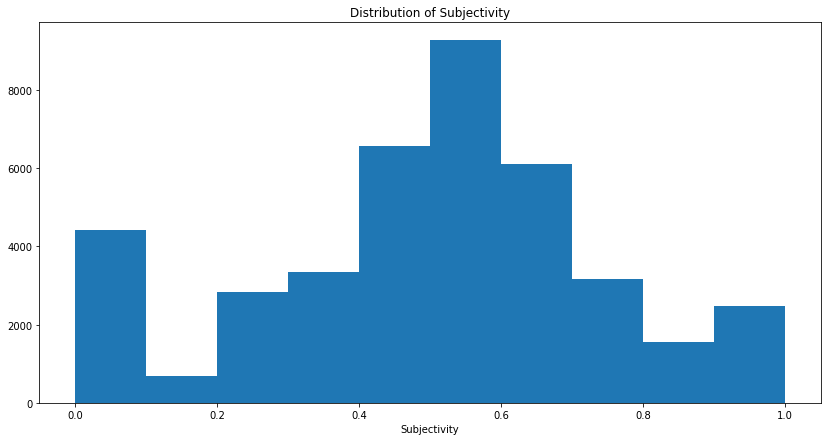

In [101]:
plt.figure(figsize=(14,7))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(merged_df[merged_df['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

**It can be seen that maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this we can conclude that macimum number of users give reviews to the applications, according to their experience.**

### **Does sentiment_subjectivity proportional to sentiment_polarity?**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



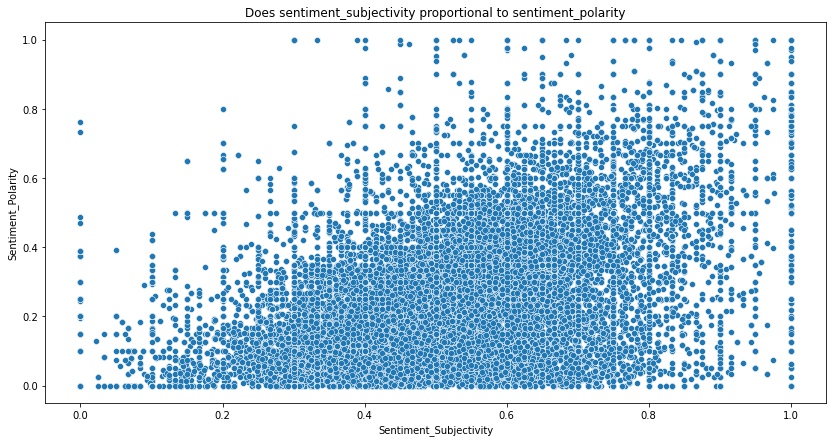

In [102]:
sentimet_subjectivity_polarity = merged_df.groupby(['Category'])['Sentiment_Polarity','Sentiment_Subjectivity'].mean().reset_index().rename(columns={'Sentiment_Polarity':'Sentiment_polarity_avg','Sentiment_Subjectivity':'sentiment_subjectivity_avg'})
merged_df['Sentiment_Subjectivity'] = merged_df['Sentiment_Subjectivity'].abs()
merged_df['Sentiment_Polarity'] = merged_df['Sentiment_Polarity'].abs()

plt.figure(figsize=(14,7))
sns.scatterplot(merged_df['Sentiment_Subjectivity'], merged_df['Sentiment_Polarity'])
plt.title("Does sentiment_subjectivity proportional to sentiment_polarity")
plt.show()

**From the above scatter plot it can be concluded that sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low**

### **Wordcloud**

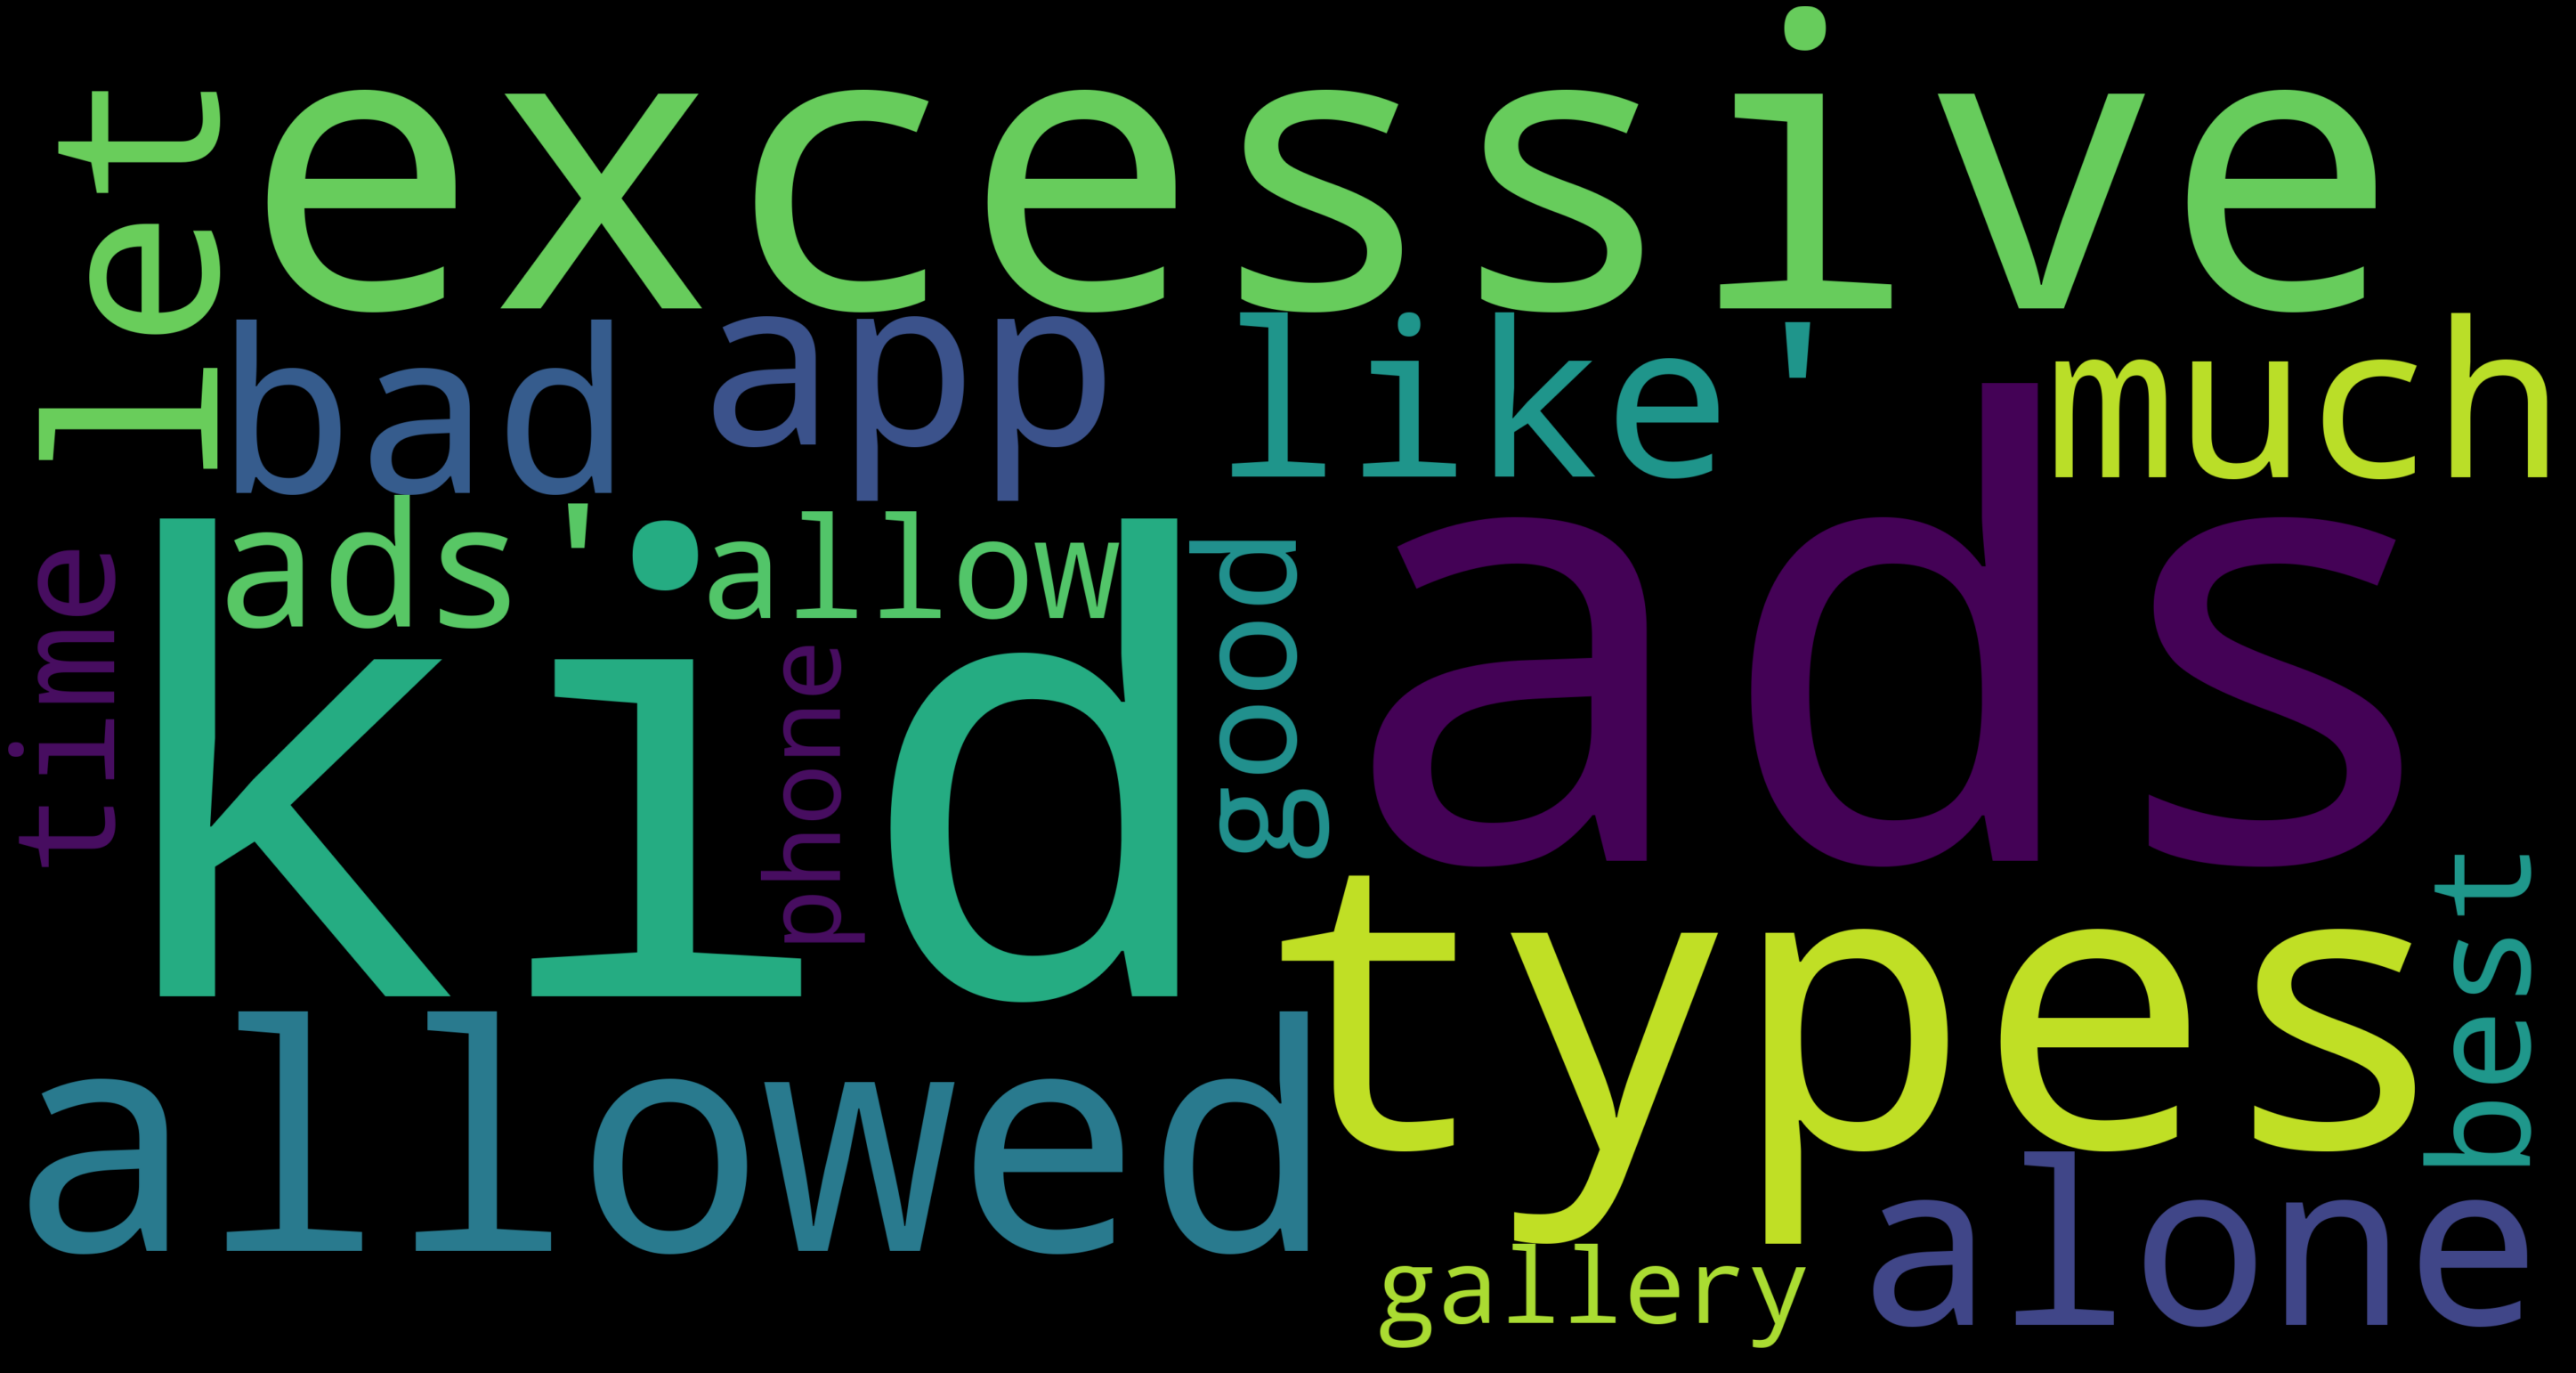

In [103]:
review_notnull = merged_df[merged_df['Translated_Review'].notnull()]

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = review_notnull.Translated_Review.values
wordcloud = WordCloud(
    width = 3920,
    height = 2080,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text).lower())
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### **Percentage of Review Sentimets**

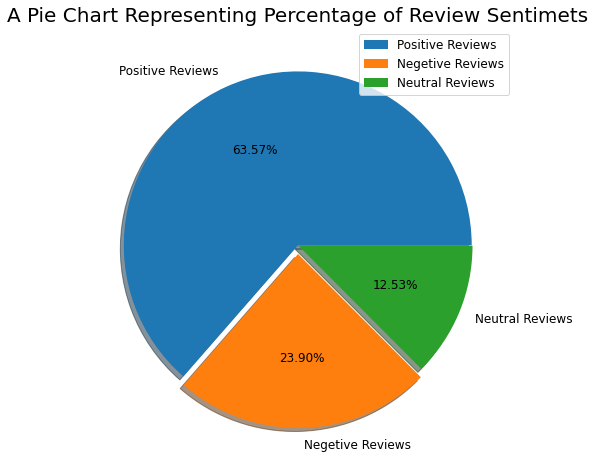

In [104]:
import matplotlib
counts = list(merged_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negetive Reviews','Neutral Reviews'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (8, 8)
plt.pie(counts, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of Review Sentimets', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()